In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
from pathlib import Path
import numpy as np
import os
from matplotlib import pyplot as plt
import matplotlib as mpl
from time import time
from munch import Munch
import pickle

from itertools import count
from matplotlib import colors

from FKMC.general import index_histogram_array, sort_IPRs, smooth, shapes
from FKMC.import_funcs import get_data_structured


%matplotlib inline
np.seterr(all='warn')
textwidth = 6.268
mpl.rcParams['figure.dpi'] = 70
default_figargs = dict(figsize = (textwidth,textwidth))


import logging
mpl_logger = logging.getLogger('matplotlib')
mpl_logger.setLevel(logging.WARNING) 

In [10]:
with open('/data/users/tch14/pickled_data/Long_range_IPR_and_DOS_processed.pickle', 'rb') as file: 
    oLR = pickle.load(file)

o = oLR

o.I = [None for _ in o.Ns] 
o.E = [None for _ in o.Ns]
o.sI = [None for _ in o.Ns] 
o.sE = [None for _ in o.Ns]

for i, N in enumerate(o.Ns):
    
    o.E[i] = np.where(o.E_hist[i] > 0, o.E_hist[i], 1)
    o.I[i] = np.where(o.E_hist[i] > 0, o.IPR_hist[i]/o.E[i], 0)

    o.sI[i] = smooth(o.I[i], scale = 64 / N, axis = -1)
    o.sE[i] = smooth(o.E_hist[i], scale = 64/N, axis = -1) / N #normalise DOS AFTER using it to normalise IPR

T = 1.0798994974874372


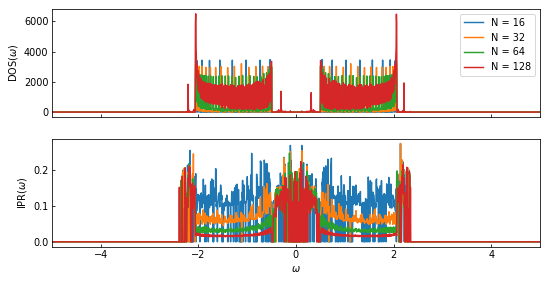

In [7]:
width = 9
height =  4.5
dpi = 150

f, axes = plt.subplots(2,1, sharex = 'all', gridspec_kw = dict(hspace = 0.2))

i = -1
T_select = 50
T = o.Ts[T_select]
print(f'T = {T}')

for i, N in enumerate(o.Ns):
    if N < 16: continue
    
    axes[0].plot(o.E_bins[1:], o.E[i][T_select, :], label = f'N = {N}')
    axes[1].plot(o.E_bins[1: ], o.I[i][T_select, :])


axes[0].set(ylabel = 'DOS($\omega$)', xlim = (-5,5))
axes[1].set(ylabel = 'IPR($\omega$)', xlabel = '$\omega$')

axes[0].legend()

#inset_ax = inset_axes(axes[1], width="30%", height="50%", loc=1, borderpad = 0.2)
#inset_ax.set(xlim = (1,3), ylabel = 'IPR', xlabel = 'N', xticks = [], yticks = [])

for a in axes: a.tick_params(direction = "in")

f.set_size_inches(width,height)
f.savefig('./no_smoothing_IPR.pdf', bbox_inches='tight')

T = 4.0


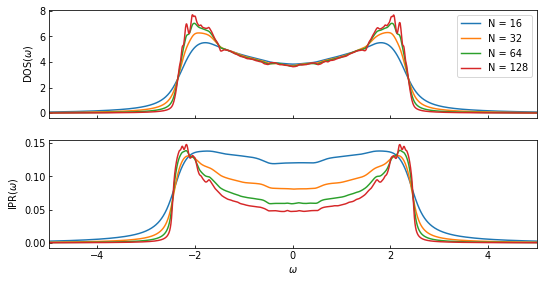

In [11]:
width = 9
height =  4.5
dpi = 150

f, axes = plt.subplots(2,1, sharex = 'all', gridspec_kw = dict(hspace = 0.2))

i = -1
T_select = -1
T = o.Ts[T_select]
print(f'T = {T}')

for i, N in enumerate(o.Ns):
    if N < 16: continue
    
    axes[0].plot(o.E_bins[1:], o.sE[i][T_select, :], label = f'N = {N}')
    axes[1].plot(o.E_bins[1: ], o.sI[i][T_select, :])


axes[0].set(ylabel = 'DOS($\omega$)', xlim = (-5,5))
axes[1].set(ylabel = 'IPR($\omega$)', xlabel = '$\omega$')

axes[0].legend()

#inset_ax = inset_axes(axes[1], width="30%", height="50%", loc=1, borderpad = 0.2)
#inset_ax.set(xlim = (1,3), ylabel = 'IPR', xlabel = 'N', xticks = [], yticks = [])

for a in axes: a.tick_params(direction = "in")

f.set_size_inches(width,height)
f.savefig('./smoothing_IPR.pdf', bbox_inches='tight')

In [55]:
with open('/data/users/tch14/pickled_data/Long_range_linear_T_correlation_funcs.pickle', 'rb') as file: 
    oLR_corr = pickle.load(file)

T = 1.2758793969849247
0.22349182412790697 0.2500494186046513
0.2250686714647412 0.24996708063734682
0.22557187636752934 0.2500023575229744


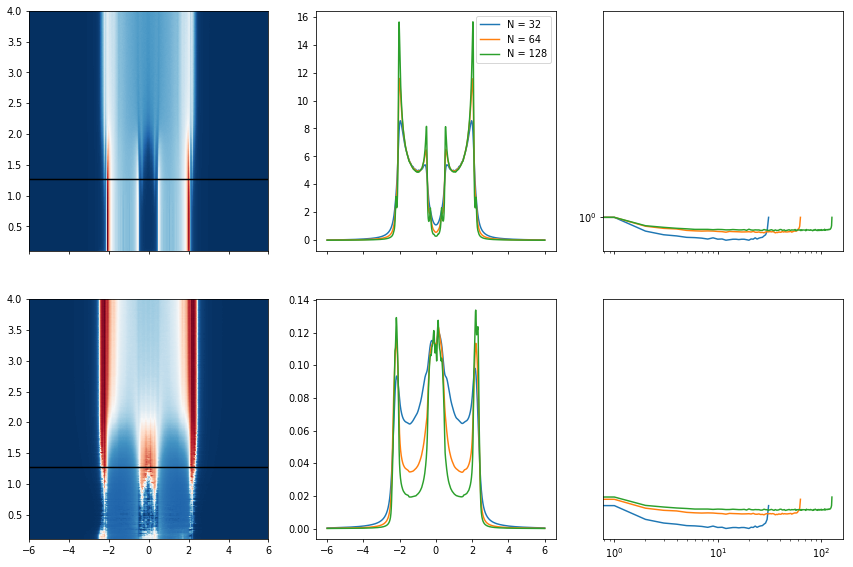

In [83]:
f, axes = plt.subplots(2,3, figsize = (15,10), sharex = 'col')

i = -1

norm = colors.Normalize(vmin = 0)
cs = axes[0, 0].pcolormesh(o.E_bins, o.Ts, o.sE[i], cmap='RdBu_r', norm = norm)

norm = colors.Normalize(vmin = 0)
cs = axes[1, 0].pcolormesh(o.E_bins, o.Ts, o.sI[i], cmap='RdBu_r', norm = norm)


T_select = 60
T = o.Ts[T_select]
print(f'T = {T}')

for i, N in enumerate(o.Ns):
    if N < 32: continue
    
    axes[0, 1].plot(o.E_bins[1:], o.sE[i][T_select, :], label = f'N = {N}')
    axes[1, 1].plot(o.E_bins[1: ], o.sI[i][T_select, :])
    
    R = oLR_corr.R[i][T_select].mean(axis = 0)
    R = R / R[1]
    axes[0, 2].loglog(R)
    
    
    axes[1, 2].loglog(oLR_corr.C[i][T_select].mean(axis = 0))
    a = oLR_corr.C[i][T_select].mean(axis = 0)
    print(min(a), max(a))

    
axes[0, 1].legend()
axes[1,0].hlines(T, -6, 6)
axes[0,0].hlines(T, -6, 6)

T = 0.1
T = 0.1


T = 0.1


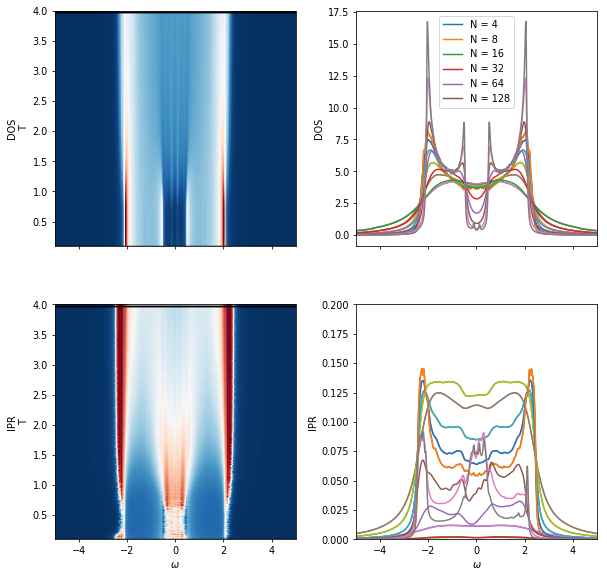

In [14]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

f, axes = plt.subplots(2,2, figsize = (10,10), sharex = 'all', gridspec_kw = dict(wspace = 0.25, hspace = 0.25))

i = -1

axes[0,0].set(xlim = (-5,5), ylabel = 'DOS\nT')
axes[1,0].set(ylabel = 'IPR\nT', xlabel = '$\omega$')

axes[0,1].set(ylabel = 'DOS')
axes[1,1].set(ylabel = 'IPR', xlabel = '$\omega$')

legend = None

def init():
    global h1, h2, E_lines, IPR_lines, legend
    
    #text = ax.text(0,1.05, f' ', fontsize = 15, transform=ax.transAxes)
    i = -1
    norm = colors.Normalize(vmin = 0)
    cs = axes[0, 0].pcolormesh(o.E_bins, o.Ts, o.sE[i], cmap='RdBu_r', norm = norm)

    norm = colors.Normalize(vmin = 0)
    cs = axes[1, 0].pcolormesh(o.E_bins, o.Ts, o.sI[i], cmap='RdBu_r', norm = norm)
    

    
    T_select = 0
    T = o.Ts[T_select]
    print(f'T = {T}')

    h1, = axes[1,0].plot((-6, 6), (T, T), 'k')
    h2, = axes[0,0].plot((-6, 6), (T, T), 'k')

    IPR_lines = []
    E_lines = []
    for i, N in enumerate(o.Ns):
        E_line, = axes[0, 1].plot(o.E_bins[1:], o.sE[i][T_select, :], label = f'N = {N}')
        IPR_line, = axes[1, 1].plot(o.E_bins[1: ], o.sI[i][T_select, :])
        E_lines.append(E_line)
        IPR_lines.append(IPR_line)
    
    
    axes[1, 1].set(ylim  = (0, 0.2))
    if legend == None: legend = axes[0, 1].legend(loc = 'upper center')
    return np.concatenate([E_lines, IPR_lines, [h1, h2]])

def update(frame):
    global h1, h2, E_lines, IPR_lines

    T_select = frame
    T = o.Ts[T_select]

    h1.set_data((-6, 6), (T,T))
    h2.set_data((-6, 6), (T,T))

    for i, N in enumerate(o.Ns):
        E_lines[i].set_data( o.E_bins[1:], o.sE[i][T_select, :])
        IPR_lines[i].set_data(o.E_bins[1: ], o.sI[i][T_select, :])
    
    return np.concatenate([E_lines, IPR_lines, [h1, h2]])

frames = range(0,200,2)
interval = 10000 /len(frames)

ani = FuncAnimation(f, update, 
                    frames=frames,
                    init_func=init, blit=False,
                    repeat_delay = 1000,
                    interval = interval,
        )
        
#ani.save('LR_IPR_sweep.mp4', dpi = 300)
HTML(ani.to_html5_video())

T = 0.1


/home/tch14/conda-envs/intelpython3.5/lib/python3.6/site-packages/matplotlib/axes/_base.py:3099: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1.0, right=1.0
  self.set_xlim(upper, lower, auto=None)
/home/tch14/conda-envs/intelpython3.5/lib/python3.6/site-packages/matplotlib/axes/_base.py:3507: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  self.set_ylim(upper, lower, auto=None)


T = 0.1


T = 0.1


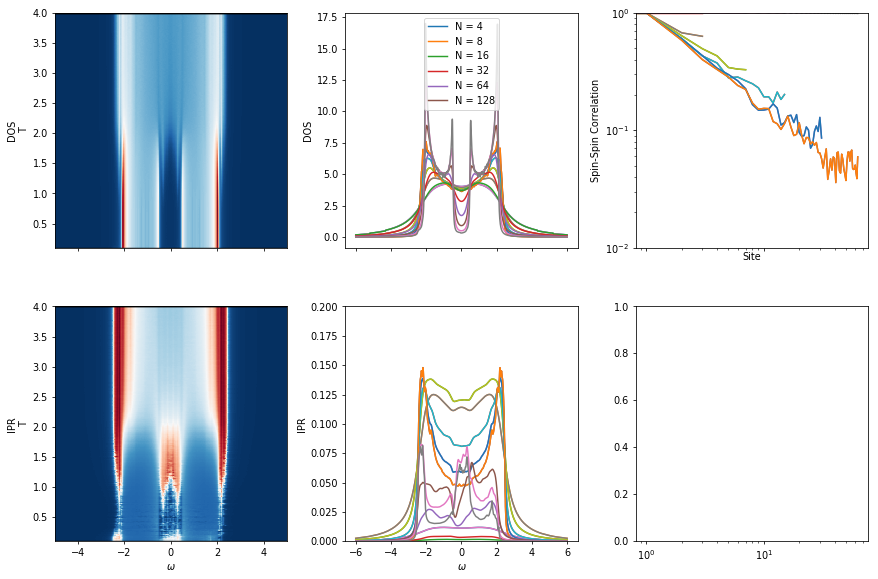

In [87]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

f, axes = plt.subplots(2,3, figsize = (15,10), sharex = 'col', gridspec_kw = dict(wspace = 0.25, hspace = 0.25))

i = -1

axes[0,0].set(xlim = (-5,5), ylabel = 'DOS\nT')
axes[1,0].set(ylabel = 'IPR\nT', xlabel = '$\omega$')

axes[0,1].set(ylabel = 'DOS')
axes[1,1].set(ylabel = 'IPR', xlabel = '$\omega$')

axes[0,2].set(ylabel = 'Spin-Spin Correlation', xlabel = 'Site')

legend = None

def init():
    global h1, h2, E_lines, IPR_lines, C_lines, legend
    
    #text = ax.text(0,1.05, f' ', fontsize = 15, transform=ax.transAxes)
    i = -1
    norm = colors.Normalize(vmin = 0)
    cs = axes[0, 0].pcolormesh(o.E_bins, o.Ts, o.sE[i], cmap='RdBu_r', norm = norm)

    norm = colors.Normalize(vmin = 0)
    cs = axes[1, 0].pcolormesh(o.E_bins, o.Ts, o.sI[i], cmap='RdBu_r', norm = norm)
    

    
    T_select = 0
    T = o.Ts[T_select]
    print(f'T = {T}')

    h1, = axes[1,0].plot((-6, 6), (T, T), 'k')
    h2, = axes[0,0].plot((-6, 6), (T, T), 'k')

    IPR_lines = []
    E_lines = []
    C_lines = []
    
    for i, N in enumerate(o.Ns):
        E_line, = axes[0, 1].plot(o.E_bins[1:], o.sE[i][T_select, :], label = f'N = {N}')
        E_lines.append(E_line)
            
        IPR_line, = axes[1, 1].plot(o.E_bins[1: ], o.sI[i][T_select, :])
        IPR_lines.append(IPR_line)
        
        R = oLR_corr.R[i][T_select].mean(axis = 0)
        R = R / R[1]
        C_line, = axes[0, 2].loglog(np.arange(N//2), R[:N//2])
        C_lines.append(C_line)
        
        
    
    axes[0,2].set(ylim = (1e-2, 1))
    axes[1, 1].set(ylim  = (0, 0.2))
    if legend == None: legend = axes[0, 1].legend(loc = 'upper center')
    return np.concatenate([E_lines, IPR_lines, [h1, h2]])

def update(frame):
    global h1, h2, E_lines, IPR_lines, C_lines

    T_select = frame
    T = o.Ts[T_select]

    h1.set_data((-6, 6), (T,T))
    h2.set_data((-6, 6), (T,T))

    for i, N in enumerate(o.Ns):
        E_lines[i].set_data( o.E_bins[1:], o.sE[i][T_select, :])
        IPR_lines[i].set_data(o.E_bins[1: ], o.sI[i][T_select, :])
        
        R = oLR_corr.R[i][T_select].mean(axis = 0)
        R = R / R[1]
        C_lines[i].set_data(np.arange(N//2), R[:N//2])
    
    return np.concatenate([E_lines, IPR_lines, [h1, h2]])

frames = range(0,200,1)
interval = 10000 /len(frames)

ani = FuncAnimation(f, update, 
                    frames=frames,
                    init_func=init, blit=False,
                    repeat_delay = 1000,
                    interval = interval,
        )
        
ani.save('LR_IPR_sweep_corr.mp4', dpi = 300)
HTML(ani.to_html5_video())

In [39]:
with open('/data/users/tch14/pickled_data/Bigger_U_IPR_and_DOS_processed.pickle', 'rb') as file: 
    o = pickle.load(file)


o.I = [None for _ in o.Ns] 
o.E = [None for _ in o.Ns]
o.sI = [None for _ in o.Ns] 
o.sE = [None for _ in o.Ns]

for i, N in enumerate(o.Ns):
    
    o.E[i] = np.where(o.E_hist[i] > 0, o.E_hist[i], 1)
    o.I[i] = np.where(o.E_hist[i] > 0, o.IPR_hist[i]/o.E[i], 0)

    o.sI[i] = smooth(o.I[i], scale = 64 / N, axis = -1)
    o.sE[i] = smooth(o.E_hist[i], scale = 64/N, axis = -1) / N #normalise DOS AFTER using it to normalise IPR
    

T = 0.1


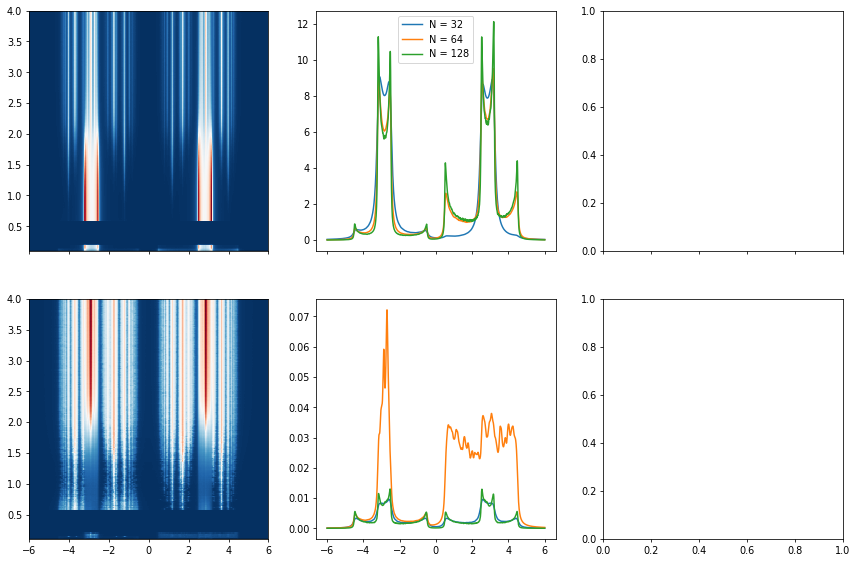

In [40]:
f, axes = plt.subplots(2,3, figsize = (15,10), sharex = 'col')

i = -1

norm = colors.Normalize(vmin = 0)
cs = axes[0, 0].pcolormesh(o.E_bins, o.Ts, o.sE[i], cmap='RdBu_r', norm = norm)

norm = colors.Normalize(vmin = 0)
cs = axes[1, 0].pcolormesh(o.E_bins, o.Ts, o.sI[i], cmap='RdBu_r', norm = norm)


T_select = 0
T = o.Ts[T_select]
print(f'T = {T}')

for i, N in enumerate(o.Ns):
    if N < 32: continue
    
    axes[0, 1].plot(o.E_bins[1:], o.sE[i][T_select, :], label = f'N = {N}')
    axes[1, 1].plot(o.E_bins[1: ], o.sI[i][T_select, :])


    
axes[0, 1].legend()
axes[1,0].hlines(T, -6, 6)
axes[0,0].hlines(T, -6, 6)

T = 0.1
T = 0.1


T = 0.1


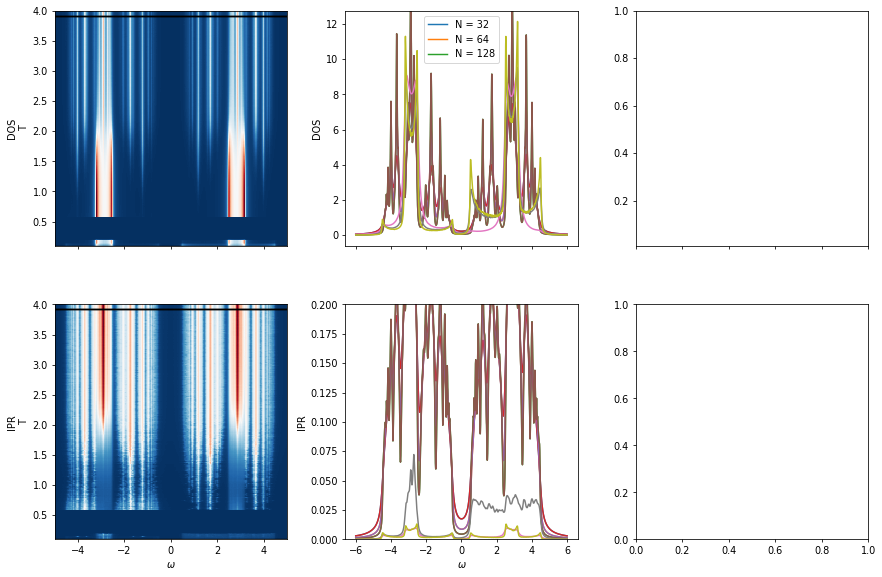

In [42]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

f, axes = plt.subplots(2,3, figsize = (15,10), sharex = 'col', gridspec_kw = dict(wspace = 0.25, hspace = 0.25))

i = -1
N_min = 16

axes[0,0].set(xlim = (-5,5), ylabel = 'DOS\nT')
axes[1,0].set(ylabel = 'IPR\nT', xlabel = '$\omega$')

axes[0,1].set(ylabel = 'DOS')
axes[1,1].set(ylabel = 'IPR', xlabel = '$\omega$')

legend = None

def init():
    global h1, h2, E_lines, IPR_lines, C_lines, legend
    
    #text = ax.text(0,1.05, f' ', fontsize = 15, transform=ax.transAxes)
    i = -1
    norm = colors.Normalize(vmin = 0)
    cs = axes[0, 0].pcolormesh(o.E_bins, o.Ts, o.sE[i], cmap='RdBu_r', norm = norm)

    norm = colors.Normalize(vmin = 0)
    cs = axes[1, 0].pcolormesh(o.E_bins, o.Ts, o.sI[i], cmap='RdBu_r', norm = norm)
    

    
    T_select = 0
    T = o.Ts[T_select]
    print(f'T = {T}')

    h1, = axes[1,0].plot((-6, 6), (T, T), 'k')
    h2, = axes[0,0].plot((-6, 6), (T, T), 'k')

    IPR_lines = [None for _ in range(len(o.Ns))]
    E_lines = [None for _ in range(len(o.Ns))]
    C_lines = [None for _ in range(len(o.Ns))]
    
    Is = np.arange(len(o.Ns))[o.Ns > N_min]
    for i, N in zip(Is, o.Ns[o.Ns > N_min]):
        
        E_lines[i], = axes[0, 1].plot(o.E_bins[1:], o.sE[i][T_select, :], label = f'N = {N}')

            
        IPR_lines[i], = axes[1, 1].plot(o.E_bins[1: ], o.sI[i][T_select, :])
        
        #R = oLR_corr.R[i][T_select].mean(axis = 0)
        #R = R / R[1]
        #C_line[i], = axes[0, 2].loglog(np.arange(N//2), R[:N//2])
        
        
    
    axes[0,2].set(ylim = (1e-2, 1))
    axes[1, 1].set(ylim  = (0, 0.2))
    if legend == None: legend = axes[0, 1].legend(loc = 'upper center')
    return np.concatenate([E_lines, IPR_lines, [h1, h2]])

def update(frame):
    global h1, h2, E_lines, IPR_lines, C_lines

    T_select = frame
    T = o.Ts[T_select]

    h1.set_data((-6, 6), (T,T))
    h2.set_data((-6, 6), (T,T))

    Is = np.arange(len(o.Ns))[o.Ns > N_min]
    for i, N in zip(Is, o.Ns[o.Ns > N_min]):

        E_lines[i].set_data( o.E_bins[1:], o.sE[i][T_select, :])
        IPR_lines[i].set_data(o.E_bins[1: ], o.sI[i][T_select, :])
        
        #R = oLR_corr.R[i][T_select].mean(axis = 0)
        #R = R / R[1]
        #C_lines[i].set_data(np.arange(N//2), R[:N//2])
    
    return np.concatenate([E_lines, IPR_lines, [h1, h2]])

frames = range(0,len(o.Ts),5)
interval = 10000 /len(frames)

ani = FuncAnimation(f, update, 
                    frames=frames,
                    init_func=init, blit=False,
                    repeat_delay = 1000,
                    interval = interval,
        )
        
ani.save('Big_U_IPR_sweep.mp4', dpi = 300)
HTML(ani.to_html5_video())